In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Reading data

In [2]:
df=pd.read_csv('/content/employee_data.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
quit                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

Exploratory Data Analysis

In [4]:
df.shape

(14999, 10)

In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
quit_Summary = df.groupby('quit')
quit_Summary.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
quit,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [7]:
corr = df.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
quit,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

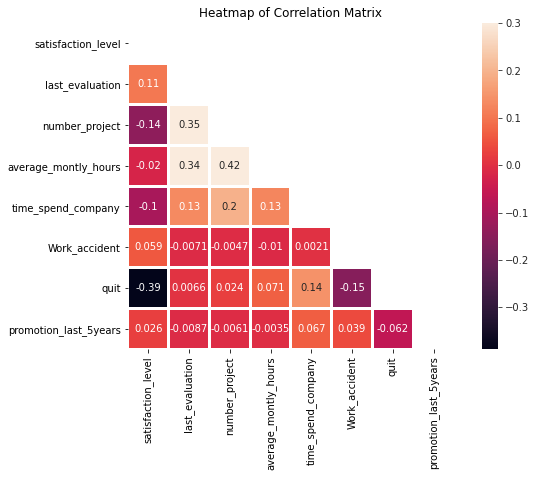

In [8]:
f, ax = plt.subplots(figsize=(10, 6))
corr = (corr)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(corr, linewidths=2.0, ax=ax, mask=mask, vmax=.3, square=True, annot=True)
plt.title('Heatmap of Correlation Matrix')

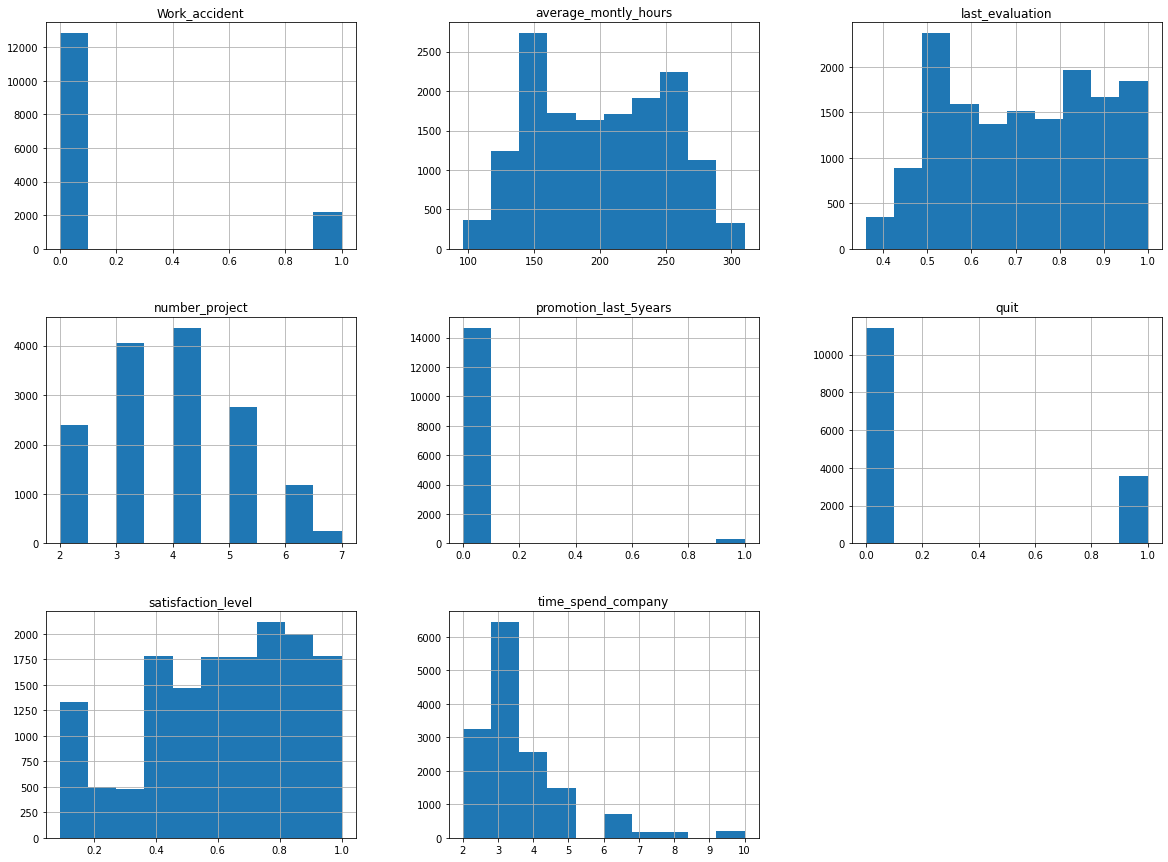

In [9]:
num_bins = 10
df.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()

Encoding Categorical Features

In [10]:
cat_feat=['department','salary']
for var in cat_feat:
    cat_list=pd.get_dummies(df[var],prefix=var)
    df=df.join(cat_list)
df.head

<bound method NDFrame.head of        satisfaction_level  last_evaluation  ...  salary_low  salary_medium
0                    0.38             0.53  ...           1              0
1                    0.80             0.86  ...           0              1
2                    0.11             0.88  ...           0              1
3                    0.72             0.87  ...           1              0
4                    0.37             0.52  ...           1              0
...                   ...              ...  ...         ...            ...
14994                0.40             0.57  ...           1              0
14995                0.37             0.48  ...           1              0
14996                0.37             0.53  ...           1              0
14997                0.11             0.96  ...           1              0
14998                0.37             0.52  ...           1              0

[14999 rows x 23 columns]>

In [11]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0,0,1,0


In [12]:
df.drop(columns=['department','salary'],axis=1,inplace=True)

In [13]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


Creating train test set

In [14]:
X=df.drop(['quit'],axis=1)
y=df.quit

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)
X_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
12896,0.73,0.62,4,247,4,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
12545,0.78,1.00,5,236,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
14833,0.10,0.55,2,247,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
8335,0.59,0.51,2,126,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2724,0.68,0.48,4,251,4,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5251,0.50,0.50,4,267,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
14755,0.43,0.49,2,135,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
14268,0.10,0.81,6,309,4,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3211,0.58,0.90,4,175,3,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0


Decision tree classifier

In [16]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
from IPython.display import Image

In [17]:
def plot_tree(crit,split,depth,min_split,min_leaf):
    classifier=DecisionTreeClassifier(random_state=147,criterion=crit,splitter=split,max_depth=depth,min_samples_split=min_split,min_samples_leaf=min_leaf)
    classifier.fit(X_train,y_train)
    print('Decison Tree Training Accuracy: ',accuracy_score(y_train,classifier.predict(X_train)))
    print('Decison Tree Test Accuracy: ',accuracy_score(y_test,classifier.predict(X_test))) 
    print('Decison Tree  Training confusion matrix: ')
    print(confusion_matrix(y_train,classifier.predict(X_train)))
    print('Decison Tree Training classification report: ')
    print(classification_report(y_train,classifier.predict(X_train),target_names=['stayed','quit']))
    print('Decison Tree  Testing confusion matrix: ')
    print(confusion_matrix(y_test,classifier.predict(X_test)))
    print('Decison Tree Testing classification report: ')
    print(classification_report(y_test,classifier.predict(X_test),target_names=['stayed','quit']))
    feature_importances = pd.DataFrame(classifier.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance', ascending=False)
    feature_importances = feature_importances.reset_index()
    #print(feature_importances)
    sns.set(style="whitegrid")
    f, ax = plt.subplots(figsize=(13, 7))
    sns.set_color_codes("pastel")
    sns.barplot(x="importance", y='index', data=feature_importances,label="Feature Importance", color="b")
    plt.title('Feature Importance plot')
    graph=Source(tree.export_graphviz(classifier,out_file=None,feature_names=X_train.columns,class_names=['stayed','quit'],filled=True))
    display(Image(data=graph.pipe(format='png')))   
    return classifier
decision_plot = interactive(plot_tree,crit=['gini','entropy'],split=['best','random'],depth=IntSlider(min=1,max=30,value=2, continuous_update=False),min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False))
display(decision_plot)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

Random forest classifier

In [18]:
def plot_tree_rf(crit,bootstrap,depth,forests,min_split,min_leaf):
    classifier=RandomForestClassifier(random_state=123,criterion=crit,bootstrap=bootstrap,n_estimators=forests,max_depth=depth,min_samples_split=min_split,min_samples_leaf=min_leaf,n_jobs=-1,verbose=False)
    classifier.fit(X_train,y_train)
    print('Random forest Training Accuracy: ',accuracy_score(y_train,classifier.predict(X_train)))
    print('Random forest Test Accuracy: ',accuracy_score(y_test,classifier.predict(X_test))) 
    print('Random forest  Training confusion matrix: ')
    print(confusion_matrix(y_train,classifier.predict(X_train)))
    print('Random forest Training classification report: ')
    print(classification_report(y_train,classifier.predict(X_train),target_names=['stayed','quit']))
    print('random forest  Testing confusion matrix: ')
    print(confusion_matrix(y_test,classifier.predict(X_test)))
    print('random forest Testing classification report: ')
    print(classification_report(y_test,classifier.predict(X_test),target_names=['stayed','quit']))
    feature_importances = pd.DataFrame(classifier.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance', ascending=False)
    feature_importances = feature_importances.reset_index()
    sns.set(style="whitegrid")
    f, ax = plt.subplots(figsize=(13, 7))
    sns.set_color_codes("pastel")
    sns.barplot(x="importance", y='index', data=feature_importances,label="Feature Importance", color="b")
    plt.title('Feature Importance plot')
    num_tree=classifier.estimators_[0]
    graph=Source(tree.export_graphviz(num_tree,out_file=None,feature_names=X_train.columns,class_names=['stayed','quit'],filled=True))
    display(Image(data=graph.pipe(format='png')))
    return classifier
decision_plot = interactive(plot_tree_rf,crit=['gini','entropy'],bootstrap=['True','False'],depth=IntSlider(min=1,max=30,value=3, continuous_update=False),forests=IntSlider(min=1,max=200,value=100,continuous_update=False),min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False))
display(decision_plot)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

Roc Curve

In [19]:
from sklearn.metrics import roc_auc_score
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
dt_auc = roc_auc_score(y_test, dt.predict(X_test))
rf_auc = roc_auc_score(y_test, rf.predict(X_test))

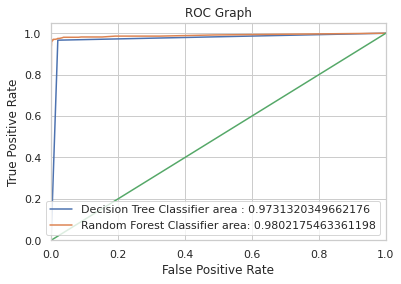

In [20]:
from sklearn.metrics import roc_curve
dt_fpr, dt_tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(dt_fpr, dt_tpr, label='Decision Tree Classifier area : {}'.format(dt_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier area: {}'.format(rf_auc))
plt.plot([0,1], [0,1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()